In [15]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa
from tqdm import tqdm
import librosa.display
import IPython.display as ipd

In [16]:
## Loading the dataset
df=pd.read_csv(r'/content/drive/MyDrive/audios/csv files/MFCCs-mean-features.csv')
df

,filename,emotion,intensity,modality,gender,actor_id,filepath,AE_mean,RMSE_mean,ZCR_mean,STFT_Mean,Mel_Spec_Mean,MFCCs_Mean,Delta_MFCCs_Mean,Delta2_MFCCs_Mean
0,03-01-01-01-02-01-22.wav,Neutral,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.007719,0.002580,0.059296,-60.428200,-59.775326,-50.131390,2.537096e-02,2.021569e-02
1,03-01-01-01-01-02-22.wav,Neutral,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.007135,0.002282,0.067220,-56.916866,-58.761707,-49.803470,6.441627e-03,-6.827511e-04
2,03-01-01-01-01-01-22.wav,Neutral,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.006430,0.002092,0.061312,-62.103832,-60.459347,-50.766724,7.032625e-03,6.791476e-03
3,03-01-01-01-02-02-22.wav,Neutral,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.007372,0.002385,0.072839,-59.418793,-58.998386,-49.841770,2.169864e-02,1.062365e-02
4,03-01-03-02-02-01-22.wav,Happy,Strong,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.039155,0.013946,0.086826,-41.707737,-44.102240,-41.953680,6.720034e-05,2.893625e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,03-02-06-02-02-01-02.wav,Fearful,Strong,Audio-Only,Female,2,/content/drive/MyDrive/audios/wav files/Audio_...,0.052375,0.020592,0.086145,-41.801178,-37.949177,-44.051697,-7.263707e-04,-5.740985e-04
2448,03-02-06-01-02-01-02.wav,Fearful,Normal,Audio-Only,Female,2,/content/drive/MyDrive/audios/wav files/Audio_...,0.032363,0.012334,0.075225,-46.704475,-42.996613,-47.146614,1.396030e-03,7.111389e-04
2449,03-02-06-01-02-02-02.wav,Fearful,Normal,Audio-Only,Female,2,/content/drive/MyDrive/audios/wav files/Audio_...,0.030873,0.012220,0.081032,-47.615790,-42.449875,-47.768387,-3.971914e-04,5.419597e-05
2450,03-02-06-02-01-01-02.wav,Fearful,Strong,Audio-Only,Female,2,/content/drive/MyDrive/audios/wav files/Audio_...,0.050430,0.019506,0.078261,-41.359110,-37.962887,-42.599957,-3.610886e-05,-3.039670e-05


In [17]:
# Drop duplicates by emotion (keep first occurrence in sorted order)
sample_df = df.drop_duplicates(subset="emotion", keep="first").reset_index(drop=True)

In [18]:
sample_df

,filename,emotion,intensity,modality,gender,actor_id,filepath,AE_mean,RMSE_mean,ZCR_mean,STFT_Mean,Mel_Spec_Mean,MFCCs_Mean,Delta_MFCCs_Mean,Delta2_MFCCs_Mean
0,03-01-01-01-02-01-22.wav,Neutral,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.007719,0.002580,0.059296,-60.428200,-59.775326,-50.131390,0.025371,0.020216
1,03-01-03-02-02-01-22.wav,Happy,Strong,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.039155,0.013946,0.086826,-41.707737,-44.102240,-41.953680,0.000067,0.000029
2,03-01-06-01-01-02-22.wav,Fearful,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.019092,0.006825,0.074225,-50.425930,-50.052124,-44.993470,0.001570,0.002880
3,03-01-05-01-01-02-22.wav,Angry,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.013993,0.004921,0.067611,-53.005974,-54.309925,-45.926350,0.005297,0.002013
4,03-01-04-02-01-02-22.wav,Sad,Strong,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.012192,0.004235,0.073844,-53.423607,-52.924065,-48.038770,0.003808,-0.006089
5,03-01-02-02-02-02-22.wav,Calm,Strong,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.005348,0.001646,0.081637,-61.267128,-57.698692,-49.684185,-0.019712,0.004205
6,03-01-07-01-01-01-22.wav,Disgust,Normal,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.012947,0.004358,0.068977,-51.186543,-52.578148,-45.628815,-0.000030,-0.001373
7,03-01-08-02-01-01-22.wav,Surprised,Strong,Audio-Only,Female,22,/content/drive/MyDrive/audios/wav files/Audio_...,0.022025,0.007865,0.076079,-48.849216,-49.760662,-46.184920,0.000041,-0.000100


In [19]:
## Creating list for all emotions files.
Neutral_file=sample_df['filepath'][0]
Calm_file=sample_df['filepath'][5]
Happy_file=sample_df['filepath'][1]
Sad_file=sample_df['filepath'][4]
Angry_file=sample_df['filepath'][3]
Fearful_file=sample_df['filepath'][2]
Disgust_file=sample_df['filepath'][6]
Surprised_file=sample_df['filepath'][7]
audio=[Neutral_file,Calm_file,Happy_file,Sad_file,Angry_file,Fearful_file,Disgust_file,Surprised_file]

In [20]:
# load audio files with librosa
neutral, sr = librosa.load(Neutral_file)
calm, _ = librosa.load(Calm_file)
happy, _ = librosa.load(Happy_file)
sad, _ = librosa.load(Sad_file)
angry, _ = librosa.load(Angry_file)
fearful, _ = librosa.load(Fearful_file)
disgust, _ = librosa.load(Disgust_file)
surprised, _ = librosa.load(Surprised_file)

## Fetching STFT for BER calcns.

In [21]:
FRAME_SIZE = 2048
HOP_SIZE = 512

angry_spec = librosa.stft(angry, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
happy_spec = librosa.stft(happy, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
sad_spec = librosa.stft(sad, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

## **Calculating Band Energy Ratio**

In [22]:
## Function to calculate frequency bins upon spliting the signal.

def calculate_split_frequency_bin(split_frequency, sample_rate, num_frequency_bins):
    """Infer the frequency bin associated to a given split frequency."""

    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / num_frequency_bins
    split_frequency_bin = math.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)

In [23]:
split_frequency_bin = calculate_split_frequency_bin(2000, 22050, 1025)
split_frequency_bin

185

In [24]:
## Function to calculate Band Energy Ratio.

def band_energy_ratio(spectrogram, split_frequency, sample_rate):
    """Calculate band energy ratio with a given split frequency."""

    split_frequency_bin = calculate_split_frequency_bin(split_frequency, sample_rate, len(spectrogram[0]))
    band_energy_ratio = []

    # calculate power spectrogram
    power_spectrogram = np.abs(spectrogram) ** 2
    power_spectrogram = power_spectrogram.T

    # calculate BER value for each frame
    for frame in power_spectrogram:
        sum_power_low_frequencies = frame[:split_frequency_bin].sum()
        sum_power_high_frequencies = frame[split_frequency_bin:].sum()
        band_energy_ratio_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(band_energy_ratio_current_frame)

    return np.array(band_energy_ratio)

In [25]:
ber_angry = band_energy_ratio(angry_spec, 2000, sr)
ber_happy = band_energy_ratio(happy_spec, 2000, sr)
ber_sad = band_energy_ratio(sad_spec, 2000, sr)

In [26]:
len(ber_angry)

161

## **Visualizing BER**

In [27]:
frames_angry = range(len(ber_angry))
t_angry = librosa.frames_to_time(frames_angry, hop_length=HOP_SIZE)

frames_happy = range(len(ber_happy))
t_happy = librosa.frames_to_time(frames_happy, hop_length=HOP_SIZE)

frames_sad = range(len(ber_sad))
t_sad = librosa.frames_to_time(frames_sad, hop_length=HOP_SIZE)

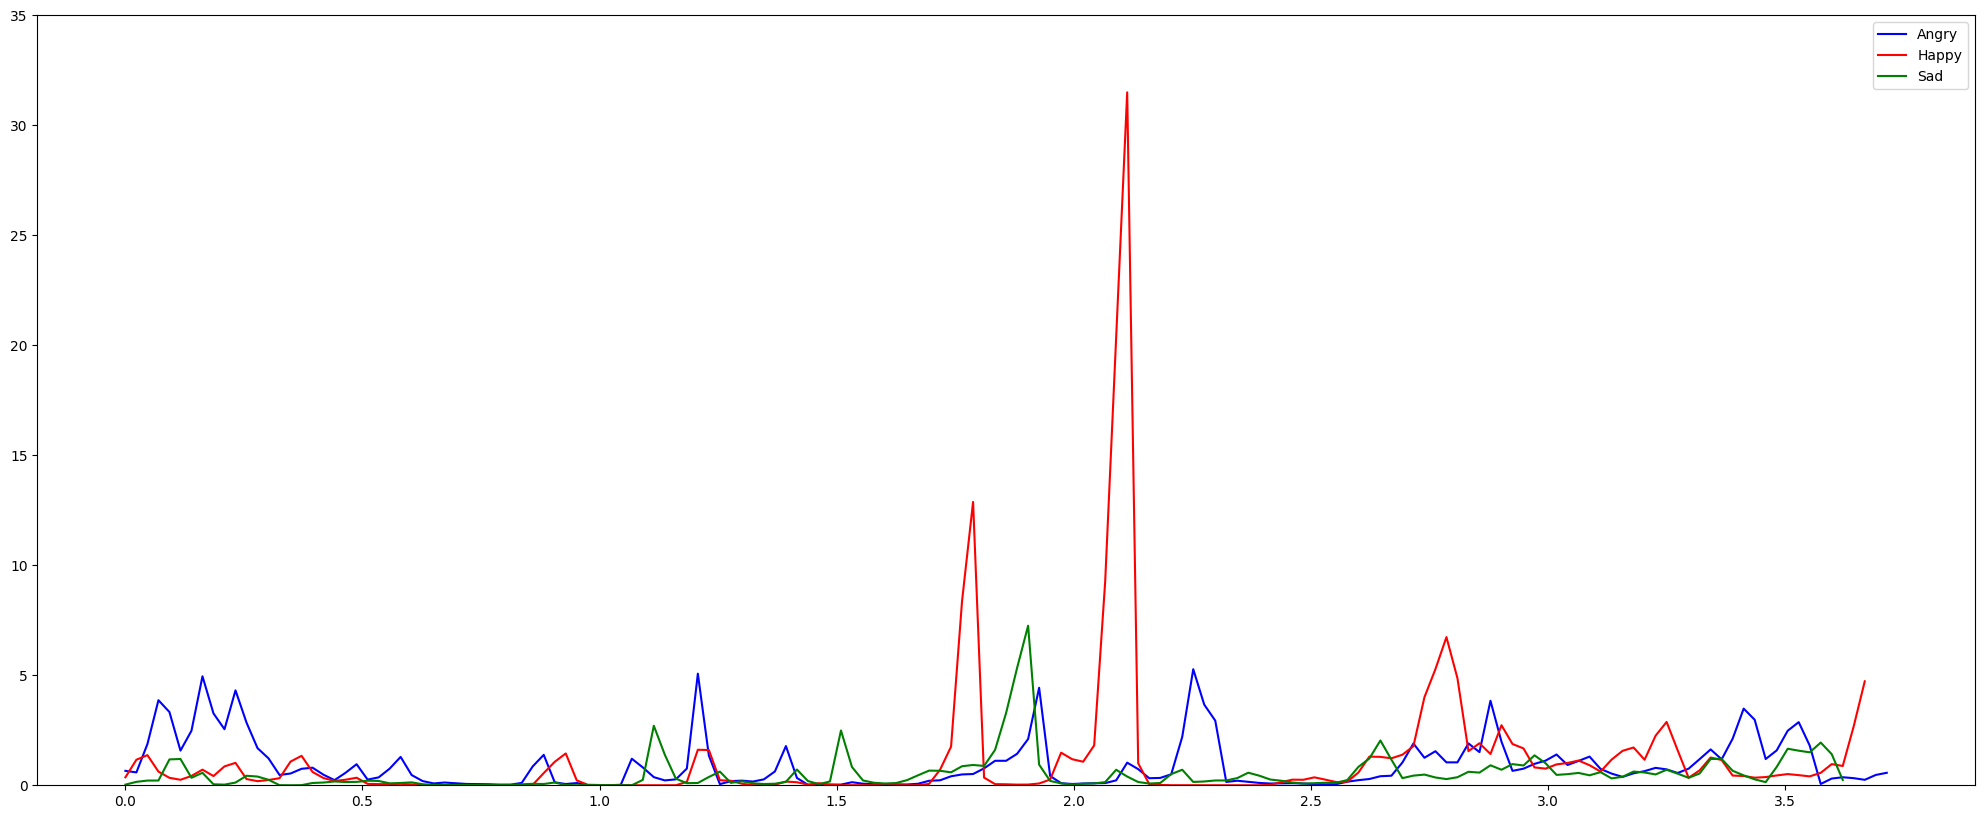

In [28]:
plt.figure(figsize=(25, 10))

plt.plot(t_angry, ber_angry, color="b", label="Angry")
plt.plot(t_happy, ber_happy, color="r", label="Happy")
plt.plot(t_sad, ber_sad, color="g", label="Sad")
plt.ylim((0, 35))
plt.legend()
plt.show()



 **Looking at the plot:**

* **Angry:** The BER for angry speech seems to fluctuate but generally remains in a mid-range compared to happy and sad.
* **Happy:** Happy speech appears to have generally lower BER values, especially in certain segments. This suggests that happy speech might have relatively more energy in higher frequencies.

* **Sad:** Sad speech seems to exhibit higher BER values, indicating a stronger presence of energy in the lower frequencies.




# Computing BER values for our whole dataset.

In [ ]:
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm

# ---------- BER Calculation ----------
def band_energy_ratio(spectrogram, split_frequency_bin):
    """Calculate the Band Energy Ratio (BER) for each frame in the spectrogram."""
    power_spectrogram = np.abs(spectrogram) ** 2
    power_spectrogram = power_spectrogram.T  # Transpose to iterate over frames

    ber_values = []
    for frame in power_spectrogram:
        low_freq_energy = frame[:split_frequency_bin].sum()
        high_freq_energy = frame[split_frequency_bin:].sum()
        ber = low_freq_energy / high_freq_energy if high_freq_energy != 0 else 0
        ber_values.append(ber)

    return np.array(ber_values)

# ---------- Compute Mean BER ----------
def compute_ber_mean(file_path, split_frequency_bin=185):
    try:
        y, sr = librosa.load(file_path, sr=None)
        spectrogram = librosa.stft(y, n_fft=2048, hop_length=512)
        ber = band_energy_ratio(spectrogram, split_frequency_bin)
        ber_mean = np.mean(ber)

        if not np.isnan(ber_mean):
            print(f" BER mean appended for: {file_path}")
        else:
            print(f" Warning: BER mean is NaN for {file_path}")

        return ber_mean

    except Exception as e:
        print(f" Error processing {file_path}: {e}")
        return np.nan

# ---------- Apply with Progress Bar ----------
tqdm.pandas()
df['BER_Mean'] = df['filepath'].progress_apply(lambda x: compute_ber_mean(x, split_frequency_bin=185))

# ---------- Save the Updated DataFrame ----------
df.to_csv("BER-mean-features.csv", index=False)


In [ ]:
df

## **Spectral Centroid with Librosa**

In [29]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

In [30]:
calm, sr = librosa.load(Calm_file)
disgust, _ = librosa.load(Disgust_file)
surprised, _ = librosa.load(Surprised_file)

sc_calm = librosa.feature.spectral_centroid(y=calm, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
sc_disgust = librosa.feature.spectral_centroid(y=disgust, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
sc_surprised = librosa.feature.spectral_centroid(y=surprised, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [31]:
sc_disgust.shape

(160,)

## **Visualizing Spectral Centroid**

In [32]:
frames_calm = range(len(sc_calm))
t_calm = librosa.frames_to_time(frames_calm, hop_length=HOP_SIZE)

frames_disgust = range(len(sc_disgust))
t_disgust = librosa.frames_to_time(frames_disgust, hop_length=HOP_SIZE)

frames_surprised = range(len(sc_surprised))
t_surprised = librosa.frames_to_time(frames_surprised, hop_length=HOP_SIZE)

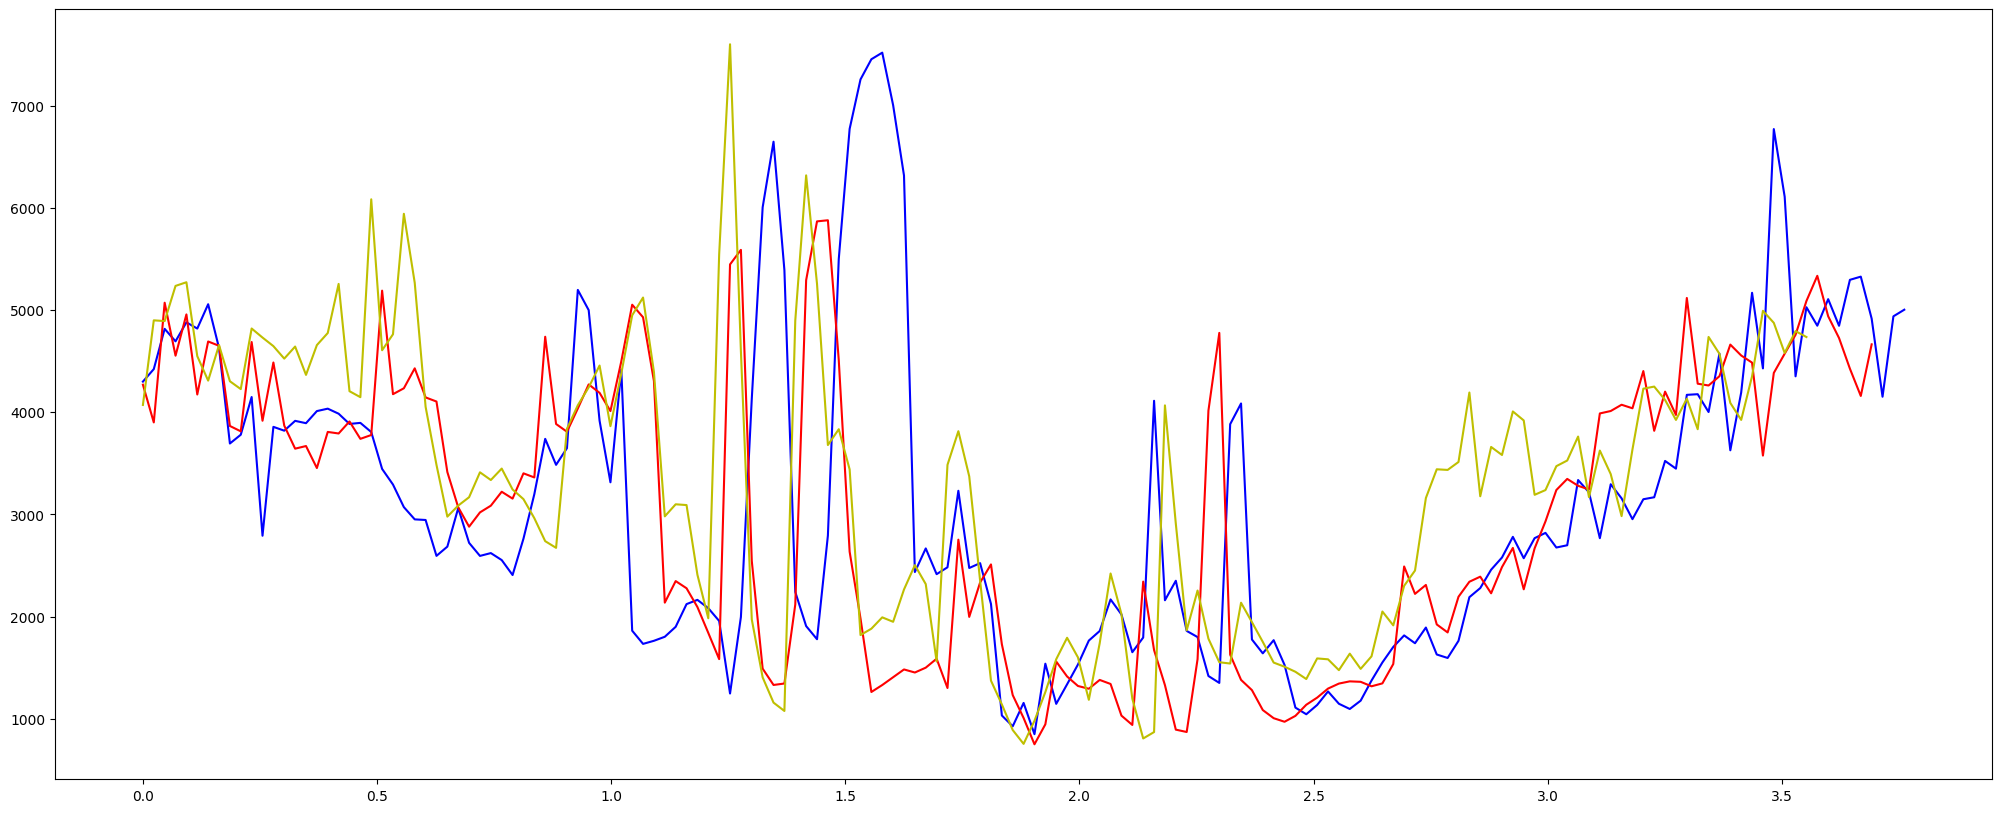

In [33]:
plt.figure(figsize=(25,10))

plt.plot(t_calm, sc_calm, color='b',label='Calm')
plt.plot(t_disgust, sc_disgust, color='r',label='disgust')
plt.plot(t_surprised, sc_surprised, color='y',label='surprised')

plt.show()

**Based on the spectral centroid plot:**

* **Calm:** The spectral centroid for calm speech appears to be relatively low and stable, suggesting that calm speech has more energy concentrated in the lower frequencies.

* **Disgust:** Disgust speech shows a somewhat higher spectral centroid than calm speech, indicating a shift towards slightly higher frequencies.

* **Surprised:** Surprised speech exhibits the highest spectral centroid among the three emotions, suggesting that surprised speech has more energy in the higher frequencies.

These observations are generally consistent with how these emotions are expressed vocally. Surprised speech, for instance, often involves a higher pitch and more high-frequency components compared to calm or disgusted speech.

## **Spectral bandwidth with Librosa**

In [34]:
ban_calm = librosa.feature.spectral_bandwidth(y=calm, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ban_disgust = librosa.feature.spectral_bandwidth(y=disgust, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ban_surprised = librosa.feature.spectral_bandwidth(y=surprised, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [35]:
ban_surprised.shape

(154,)

## **Visualising Spectral Bandwidth**

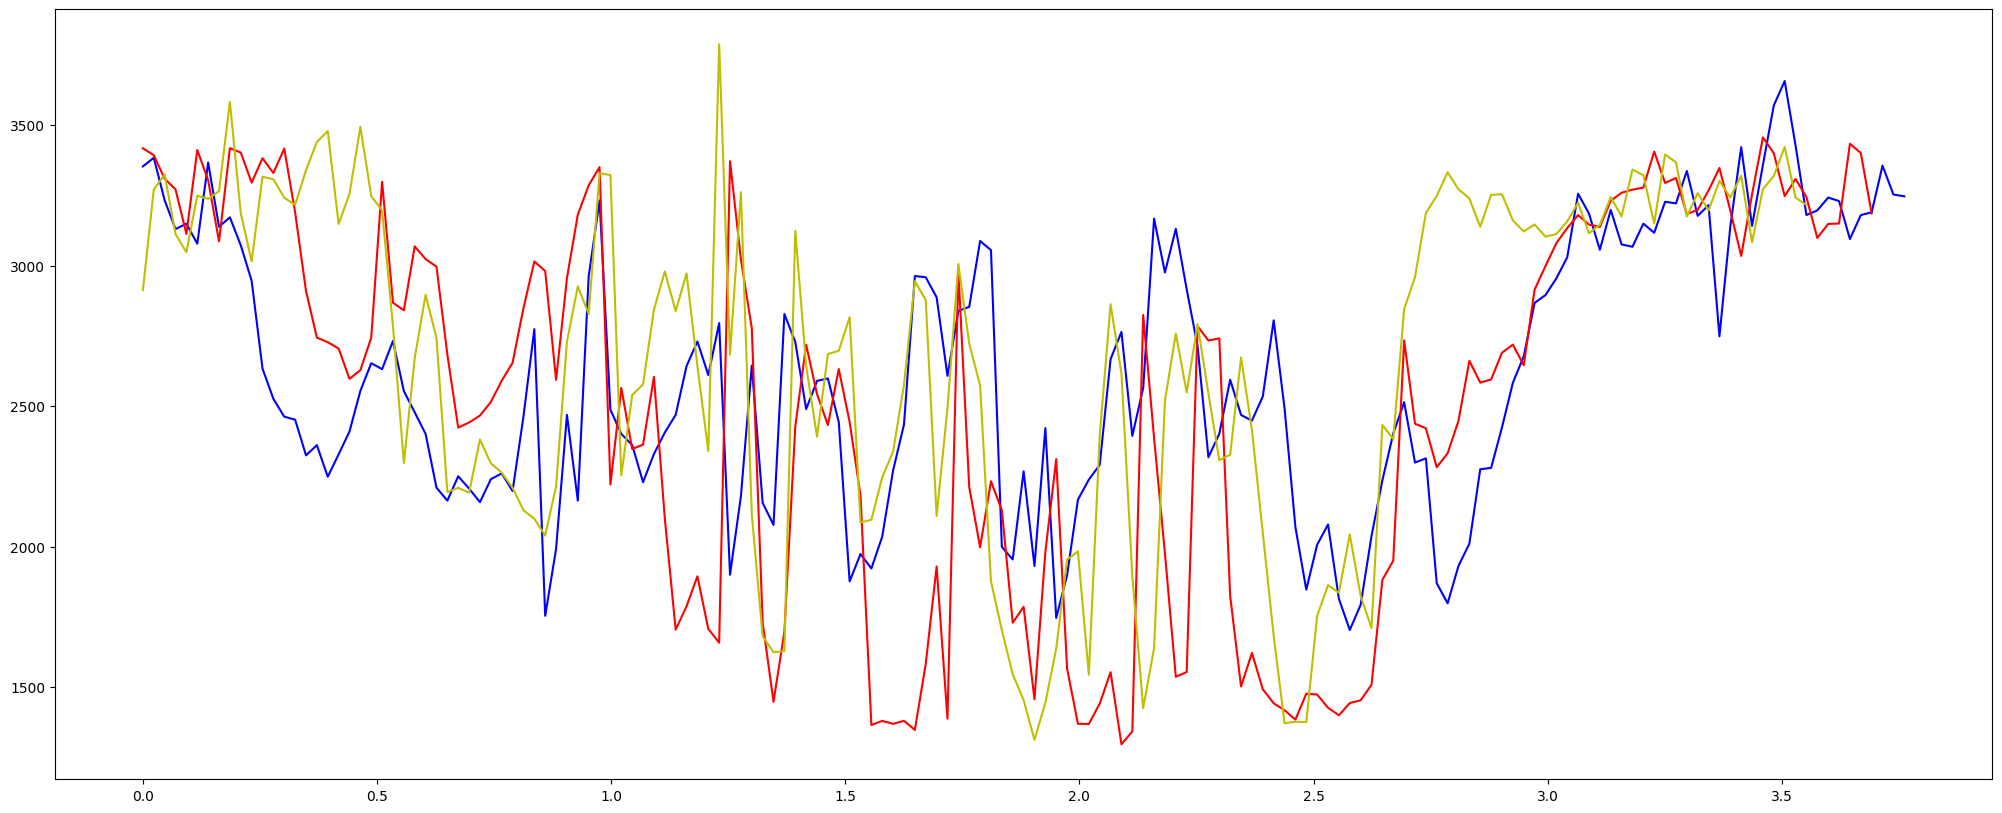

In [36]:
frames_calm = range(len(ban_calm))
t_calm = librosa.frames_to_time(frames_calm, hop_length=HOP_SIZE)

frames_disgust = range(len(ban_disgust))
t_disgust = librosa.frames_to_time(frames_disgust, hop_length=HOP_SIZE)

frames_surprised = range(len(ban_surprised))
t_surprised = librosa.frames_to_time(frames_surprised, hop_length=HOP_SIZE)


plt.figure(figsize=(25,10))

plt.plot(t_calm, ban_calm, color='b')
plt.plot(t_disgust, ban_disgust, color='r')
plt.plot(t_surprised, ban_surprised, color='y')

plt.show()

**Based on the spectral bandwidth plot:**

* **Calm:** Calm speech generally shows a narrower spectral bandwidth, indicating that the energy is concentrated within a smaller range of frequencies.

* **Disgust:** Disgust speech appears to have a slightly wider spectral bandwidth compared to calm speech, suggesting a broader spread of frequencies.

* **Surprised:** Surprised speech tends to have the widest spectral bandwidth among the three emotions, indicating that the energy is distributed across a larger range of frequencies.

This aligns with how these emotions are typically expressed; surprised speech often has a more energetic and broader frequency spectrum than calm or disgusted speech.

## Extracting SC,SB for full dataset.

In [ ]:
df.to_csv("data_with_Freq-Dom.csv", index=False)

In [ ]:
from tqdm import tqdm
import librosa
import numpy as np
import pandas as pd

# ---------- Initialize tqdm ----------
tqdm.pandas()

# ---------- Function to Extract Mean Spectral Features ----------
def extract_spectral_feature_means(file_path, frame_size=1024, hop_length=512):
    try:
        y, sr = librosa.load(file_path, sr=None)
        sc = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=frame_size, hop_length=hop_length)[0]
        sb = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=frame_size, hop_length=hop_length)[0]

        sc_mean = np.mean(sc)
        sb_mean = np.mean(sb)

        if not any(np.isnan([sc_mean, sb_mean])):
            print(f" Spectral features appended for: {file_path}")
        else:
            print(f" Warning: NaN in spectral features for {file_path}")

        return pd.Series([sc_mean, sb_mean])

    except Exception as e:
        print(f" Error processing {file_path}: {e}")
        return pd.Series([np.nan, np.nan])

# ---------- Apply Function with Progress ----------
df[['Spec_Centroid_Mean', 'Spec_Bandwidth_Mean']] = df['filepath'].progress_apply(
    lambda x: extract_spectral_feature_means(x)
)

# ---------- Save Updated DataFrame ----------
df.to_csv("Freq-Domain-mean-features.csv", index=False)


In [ ]:
df